In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'figure.autolayout': True})
%config InlineBackend.figure_format = 'retina'

In [12]:
def calc_error(mu, sigma, clamp, TE):
    
    err = np.arange(0, 10.01, 0.5)
    w = np.exp(-(err - mu) ** 2 / (2 * sigma ** 2))
    w = w / np.sum(w)
    
    idx = np.argmin(np.abs(clamp - err))
    e = w[idx] * TE + (1 - w[idx]) * clamp
    
    return e, w


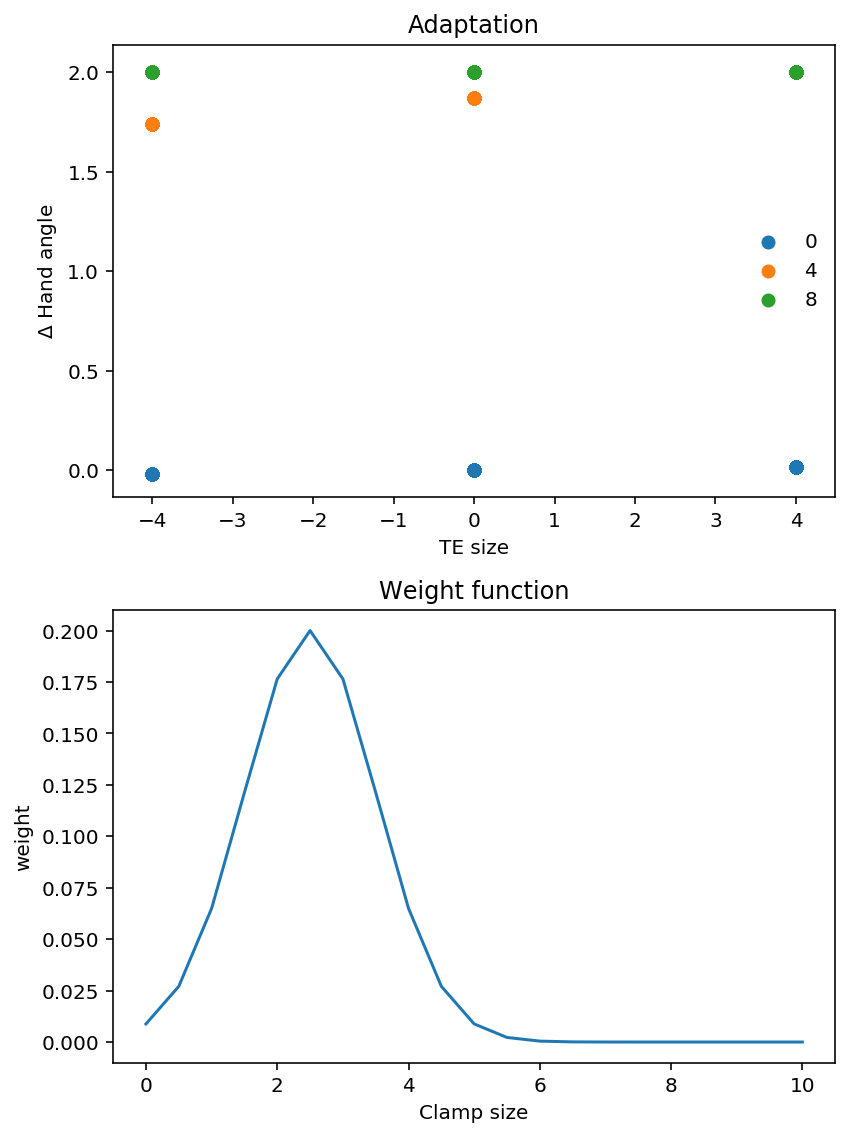

In [25]:
# initialize values
mu = 2.5
sigma = 1.0
nTrials = 100
x = np.zeros((nTrials,1))
TEs = np.array([-4, 0, 4])
TE = np.random.choice(TEs, nTrials)
clamp = [0, 4, 8]
B = [0.5, 0.5, 0.25] # hackily hand-tuning B to get our saturated error correction for now

fig, ax = plt.subplots(2, 1, figsize=(6, 8))

for i in range(len(clamp)):
    
    for n in range(nTrials-1):
    
        e, w = calc_error(mu, sigma, clamp[i], TE[n])
        x[n+1] = B[i] * e 
    
    ax[0].scatter(TE[0:nTrials-1], x[1:], label=clamp[i])
    ax[0].set(xlabel='TE size', ylabel='$\Delta$ Hand angle')
    ax[0].set_title('Adaptation')
    ax[0].legend(frameon=False)

ax[1].plot(err, w)
ax[1].set(xlabel='Clamp size', ylabel='weight', title='Weight function')
plt.tight_layout()